In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.optimize as si
import glob
import scipy.stats as st
import scipy.signal as sg
import pint as pt
import csv
u = pt.UnitRegistry()

kappa = 1.6680035382861094


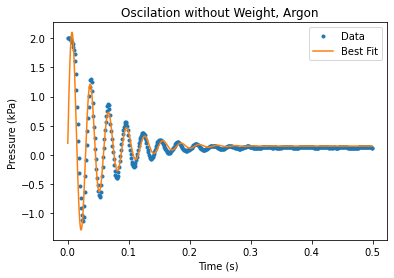

In [15]:
vol_tube = .453 * np.pi*.0025**2/4
vol_piston = np.pi*.0325**2/4 * 0.066
tot_vol=(vol_piston+vol_tube)
A = (np.pi*.0325**2)/4
w1arg = 76.543
w2arg = 83.098
w2co2 = w2arg

cali = 0.2645 * u.mV/u.psi/u.V

data_file = "argon0osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)+5
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035 
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print("kappa =" , kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation without Weight, Argon")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

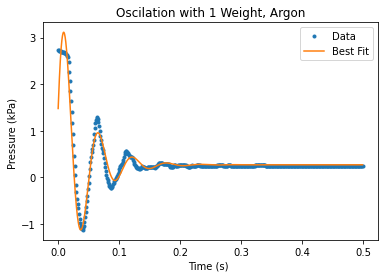

In [14]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "argon1osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with 1 Weight, Argon")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

kappa = 1.731462069642395


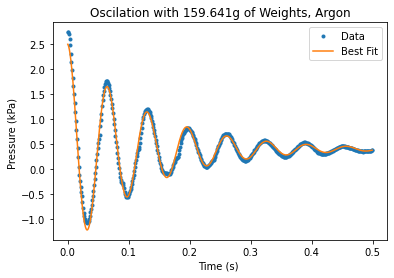

In [12]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "argon2osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035 + (w2co2/1000)+(w1arg/ 1000)
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print("kappa =" , kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with 159.641g of Weights, Argon")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

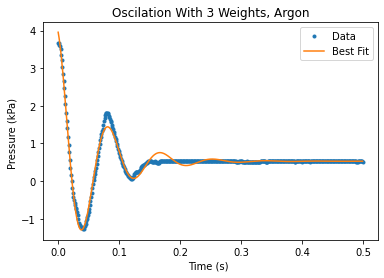

In [7]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "argon3osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation With 3 Weights, Argon")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

kappa = 1.2279303362028247


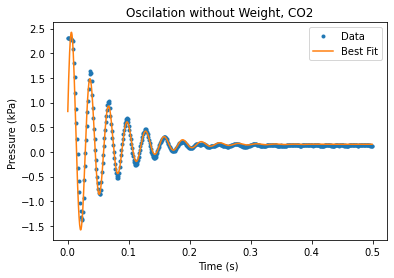

In [8]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "co20osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035 
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print("kappa =" , kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation without Weight, CO2")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

kappa = 1.3424665620783405


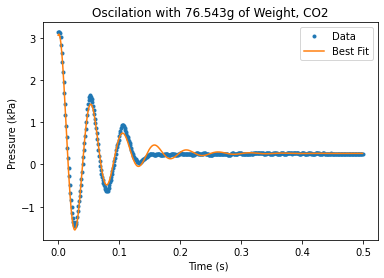

In [9]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "co21osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]
P_0 = P_0 + 101325
m = .035 + w1arg / 1000
V = tot_vol
A = A

kappa = ((omega**2)+((k**2)/4))*((m*V)/(P_0*A**2))
print("kappa =" , kappa)

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation with 76.543g of Weight, CO2")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

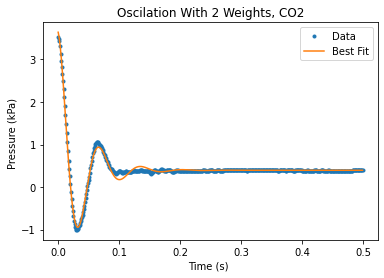

In [10]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "co22osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters = fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation With 2 Weights, CO2")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

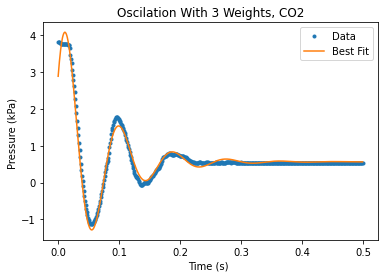

In [11]:
cali = 0.2645 * u.mV/u.psi/u.V

data_file = "co23osc.csv"

def open_file(file):
    with open(file,'r') as f:
        raw_data=list(csv.reader(f))
        f.close
    return raw_data

raw = open_file(data_file)
osc_data = np.array(raw[7:],dtype=float)

voltage = osc_data[:,1]
cor_vol = (voltage * u.mV) / (9*u.V)
p = cor_vol / cali
time = osc_data[:,0]
p= p.magnitude

start = np.argmax(p)
end = start + 500
analp= p[start:end]
analt= time[start:end]-time[start]

plt.plot(analt,analp,marker='.',linestyle='',label='Data')

def osc_func(t,P_0,C,k, omega ,phi):
    P = P_0 + C * np.exp(-k*t/2) * np.cos(omega*t+phi)
    return P

fitting_parameters = si.curve_fit(osc_func,analt,analp)

filler = np.linspace(analt[0],analt[-1],1000)

parameters=fitting_parameters[0]
P_0=parameters[0]*1000
C=parameters[1]
k=parameters[2]
omega=parameters[3]
phi=parameters[4]

plt.plot(filler,osc_func(filler, *fitting_parameters[0]), label= 'Best Fit') 
plt.title("Oscilation With 3 Weights, CO2")
plt.xlabel('Time (s) ') 
plt.ylabel('Pressure (kPa) ')
plt.legend()
plt.show()

In [3]:
kap_err_ar = np.array([1.67,1.73,1.54,1.63])
error_ar = np.std(kap_err_ar)
print(error_ar*2)

kap_err_co = np.array([1.23,1.34,1.31,1.26])
error_co = np.std(kap_err_co)
print(error_co*2)

0.1381122731693313
0.08544003745317538
